In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [106]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):#mu=mean sigma =standard deviation
    
    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [107]:
sample=create_ages()

In [108]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

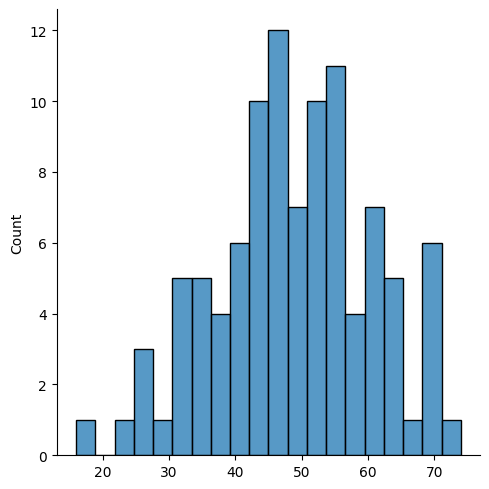

In [109]:
sns.displot(sample,bins=20)

<Axes: >

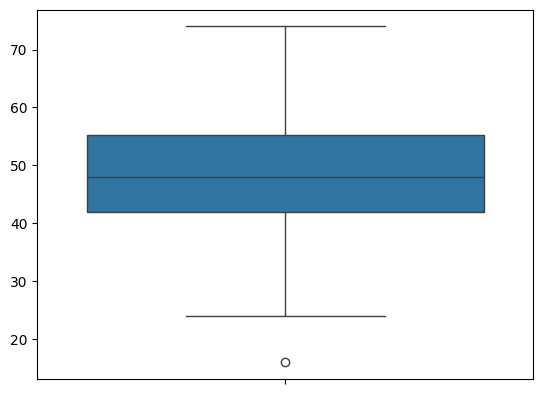

In [110]:
sns.boxplot(data=sample)

In [111]:
# we get the dot 1.5 times iqr how do we get this dot 

ser=pd.Series(sample)

In [112]:
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [113]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [114]:
#75%-25%

IQR=55.25-42
lower_limit=42-1.5*(IQR)

In [115]:
lower_limit

22.125

In [116]:
ser[ser>lower_limit]#we got rid of the outlier

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [117]:
q75,q25=np.percentile(sample,[75,25])

In [118]:
q25-1.5*IQR

22.125

In [119]:
filepath=r'C:\Users\parim\Downloads\housing.csv'
df=pd.read_csv(filepath)

In [120]:
df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [121]:
# df.corr()['SalePrice'].sort_values

In [122]:
#overall qual is highest positive correlation with sale price 

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

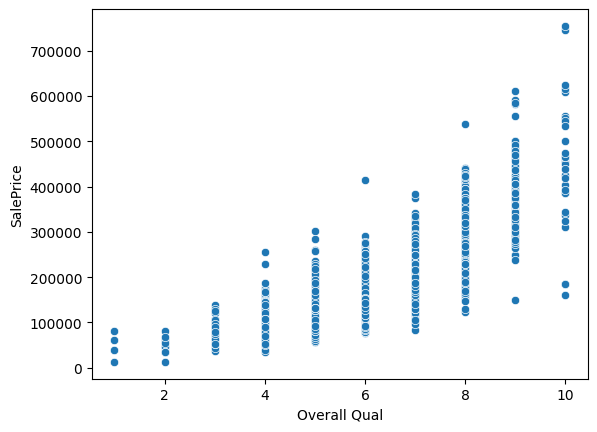

In [123]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)#lower quality of the product lower the sell price

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

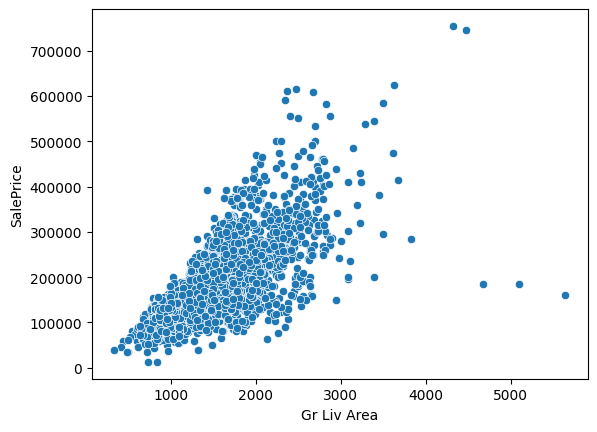

In [124]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [125]:
df[(df['Overall Qual']>8)&(df['SalePrice']<200000)]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [126]:
#first check the correlation of the objects if it is high then remove the outliers

In [127]:
drop_ind=df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [128]:
df=df.drop(drop_ind,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

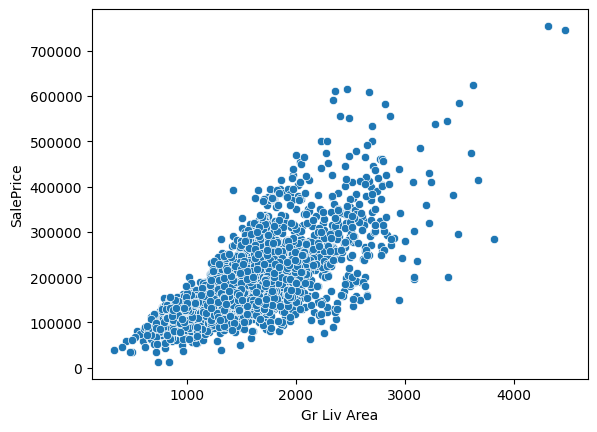

In [129]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [130]:
# with open('C:\\Users\\parim\\Downloads\\housing.csv','r') as f:
#     print(f.read())


In [131]:
df

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [132]:
df = df.drop(columns=['Unnamed: 0'])


In [133]:
df= df.drop('Order',axis=1)

In [134]:
df=df.drop("PID",axis=1)

In [135]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [136]:
len(df.columns)

80

In [137]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [138]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [139]:
df.isnull().sum()>0 #where the value ois positive

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

In [140]:
100*df.isnull().sum()/len(df)# percentage of missing values

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [141]:
def percent_missing(df):
    percent_nan=100*df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [142]:
percent_nan=percent_missing(df)

In [143]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Cars'),
  Text(2, 0, 'BsmtFin SF 1'),
  Text(3, 0, 'Garage Area'),
  Text(4, 0, 'BsmtFin SF 2'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'Total Bsmt SF'),
  Text(7, 0, 'Bsmt Half Bath'),
  Text(8, 0, 'Bsmt Full Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Bsmt Qual'),
  Text(11, 0, 'Bsmt Cond'),
  Text(12, 0, 'BsmtFin Type 1'),
  Text(13, 0, 'BsmtFin Type 2'),
  Text(14, 0, 'Bsmt Exposure'),
  Text(15, 0, 'Garage Type'),
  Text(16, 0, 'Garage Qual'),
  Text(17, 0, 'Garage Cond'),
  Text(18, 0, 'Garage Yr Blt'),
  Text(19, 0, 'Garage Finish'),
  Text(20, 0, 'Lot Frontage'),
  Text(21, 0, 'Fireplace Qu'),
  Text(22, 0, 'Mas Vnr Type'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

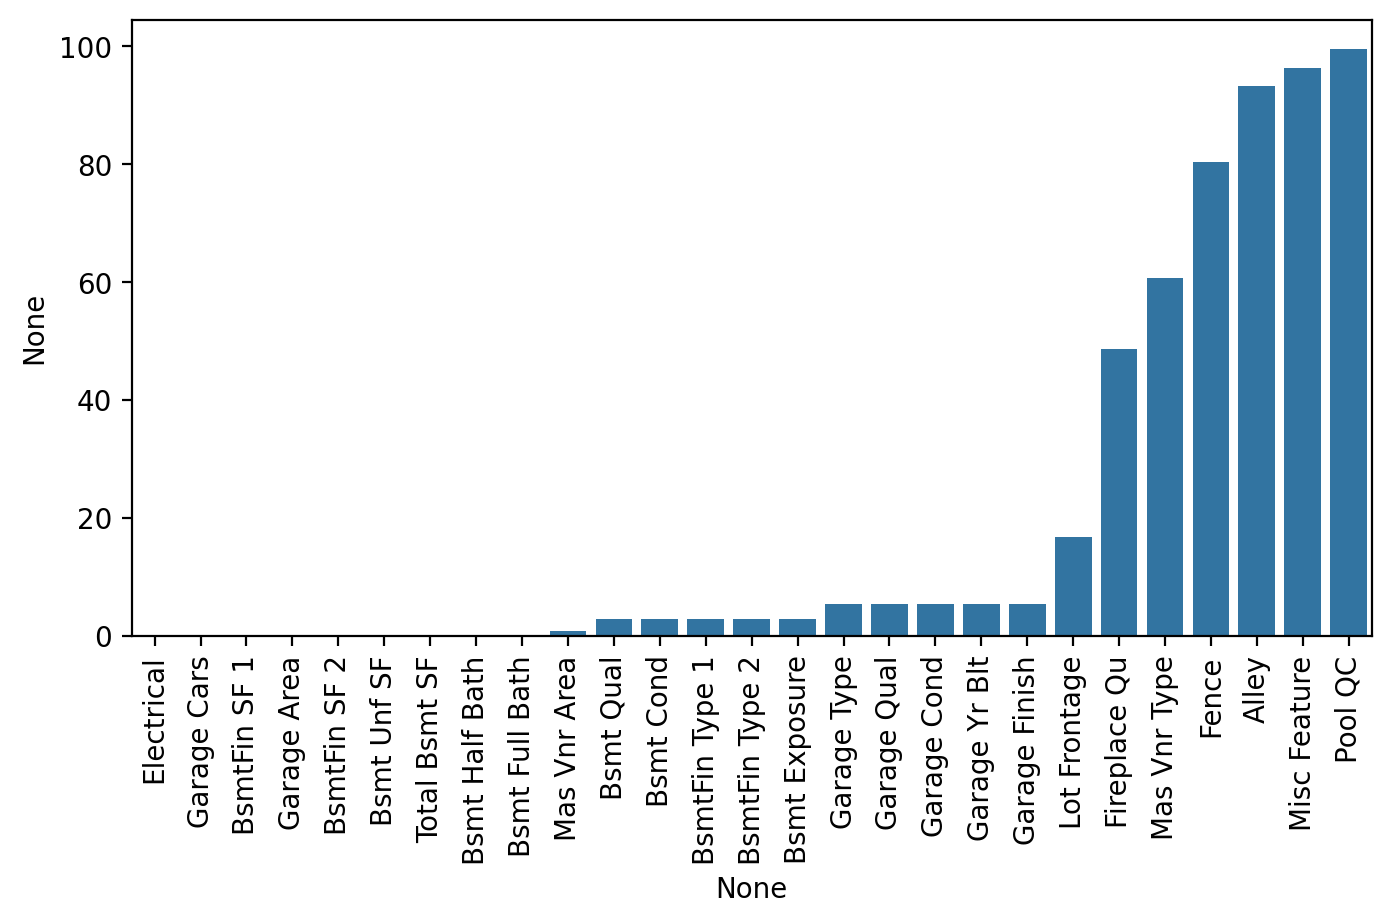

In [144]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
# plt.ylim(0,1)#in percent 0 to 100 perecent rows missing the dataa


In [145]:
# we just calculated percentage of data missing per feature column 

(0.0, 1.0)

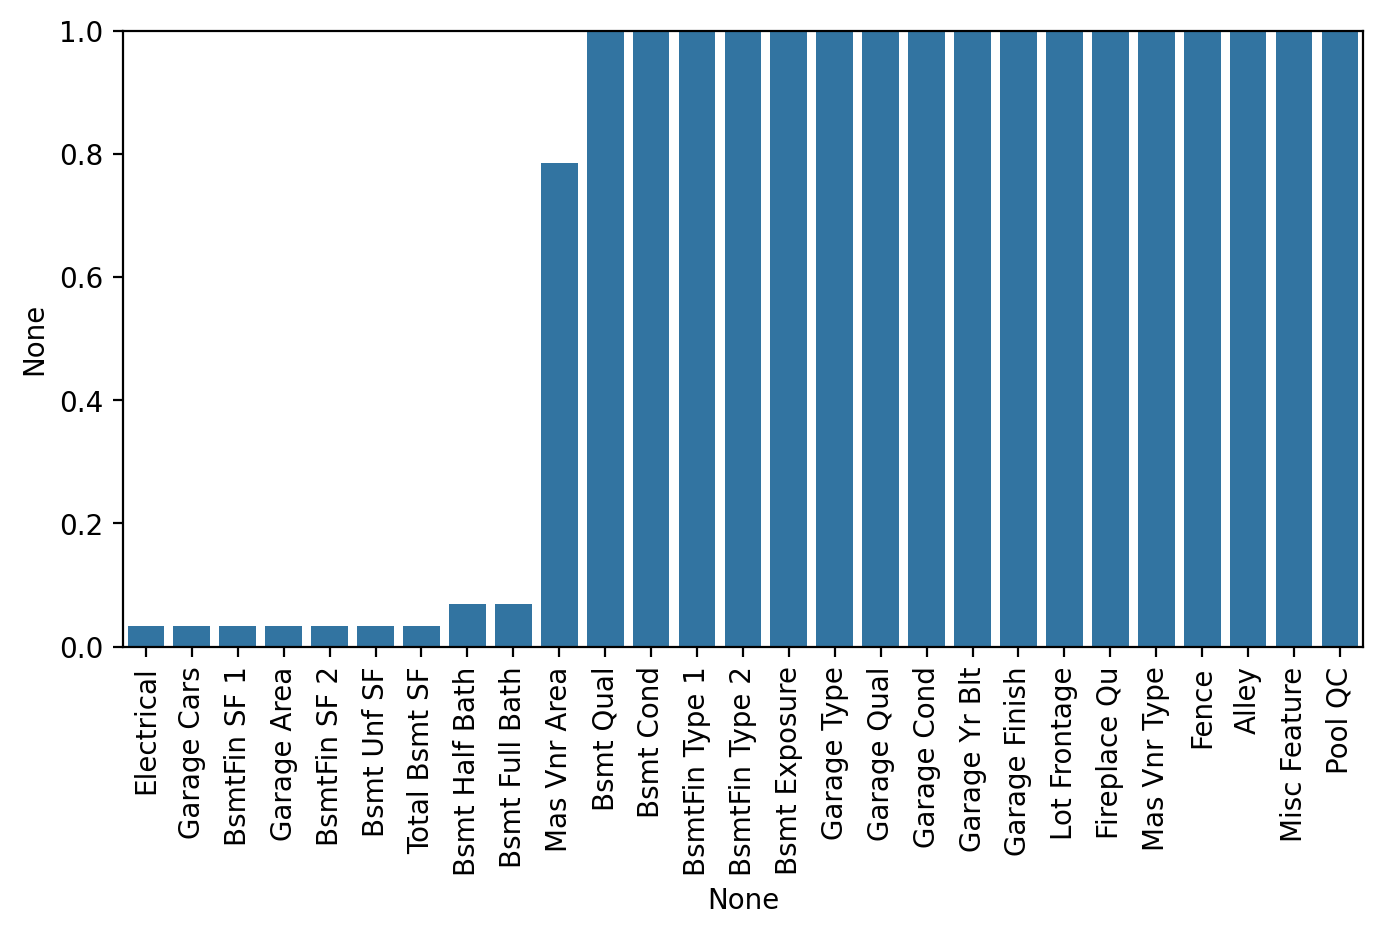

In [146]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)#in percent 0 to 100 perecent rows missing the dataa


In [147]:
#any percentage less than one is ok to drop

In [148]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [149]:
100/len(df)#only 1 row is missing for electrical,garage area etc

0.0341646737273659

In [150]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [151]:
df[df['Electrical'].isnull()]['Garage Area']#this means there is another row missing the garage area

1577    400.0
Name: Garage Area, dtype: float64

In [152]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [153]:
# we are dropping the leat percentage values

In [154]:
df=df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [155]:
percent_nan=percent_missing(df)  

In [156]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

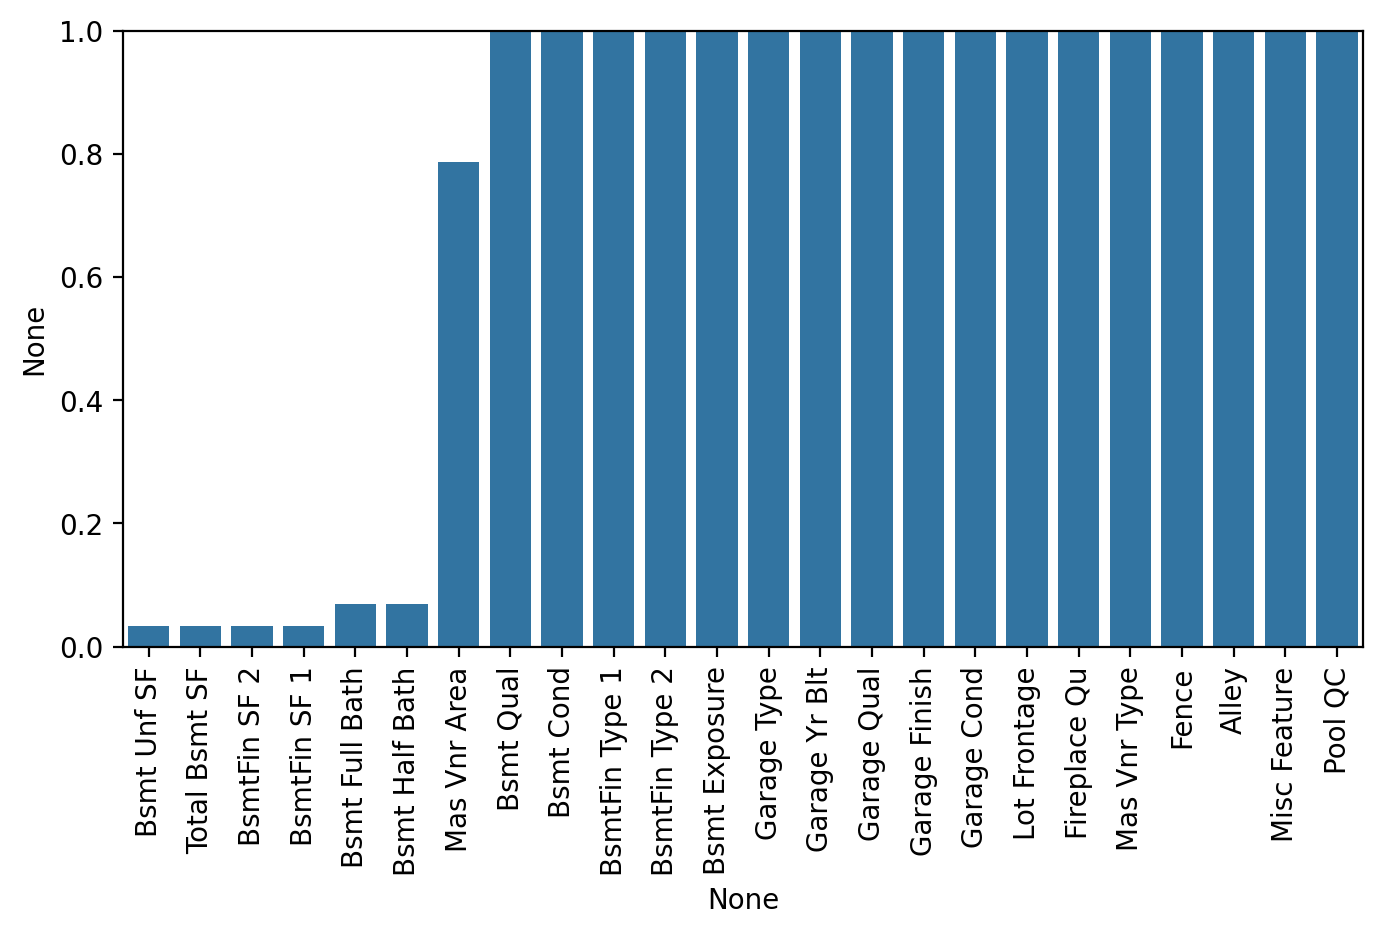

In [157]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)#in percent 0 to 100 perecent rows missing the dataa


In [158]:
#we will require domain knowledge oin this case we dropped bad data but we have to which data is ok to drop and which is not

In [159]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [160]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [161]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [162]:
#Bsmt Numeric comuns--->fill na 0 they just dont have basement for the following houses

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
#bsmt string columns

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')# it is a string None


In [163]:

df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

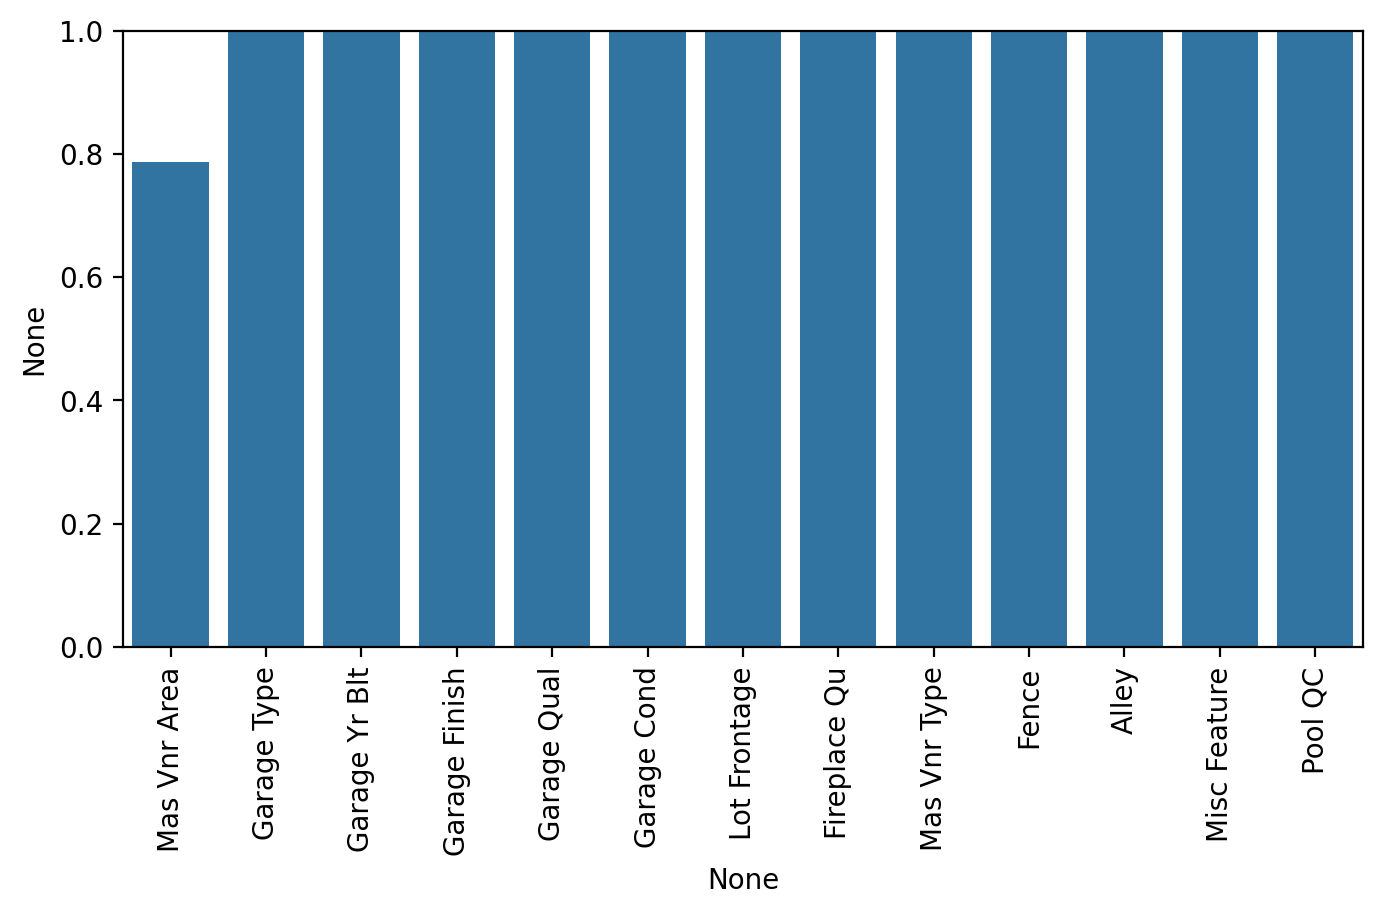

In [164]:
percent_nan=percent_missing(df)

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)#in percent 0 to 100 perecent rows missing the dataa


In [165]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [166]:
percent_nan = percent_missing(df)

(0.0, 1.0)

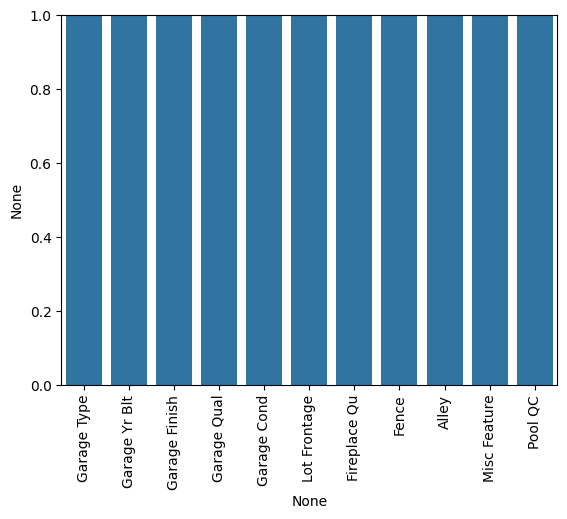

In [167]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [168]:
# #feature columns

# more than 1percent of rows are missing some of these feature values

In [169]:
#either fill missing values or drop the feature columns



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

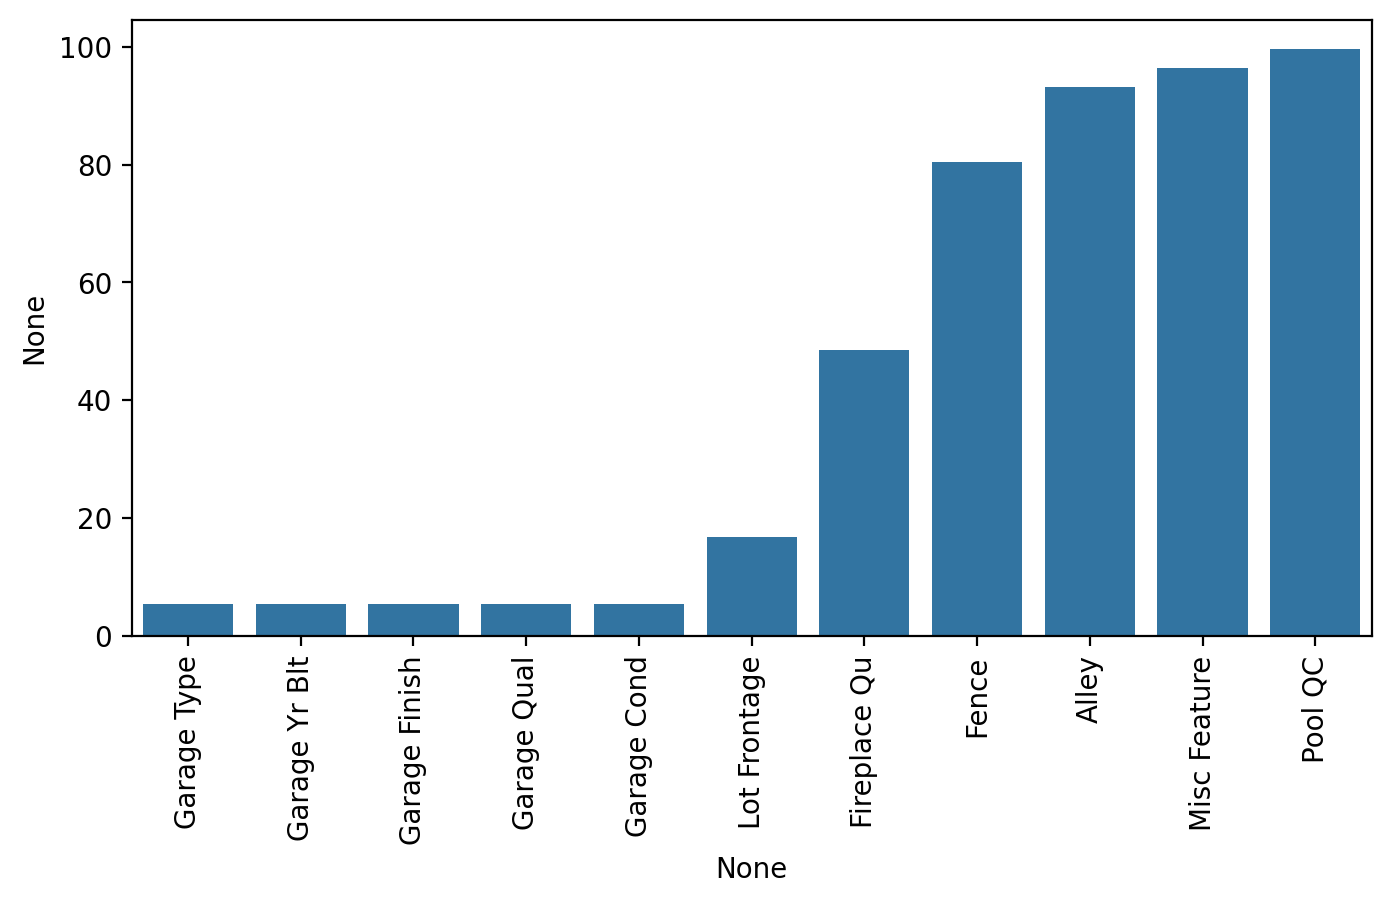

In [170]:

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


In [171]:

df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [172]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols]=df[gar_str_cols].fillna('None')

In [173]:
percent_nan=percent_missing(df)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

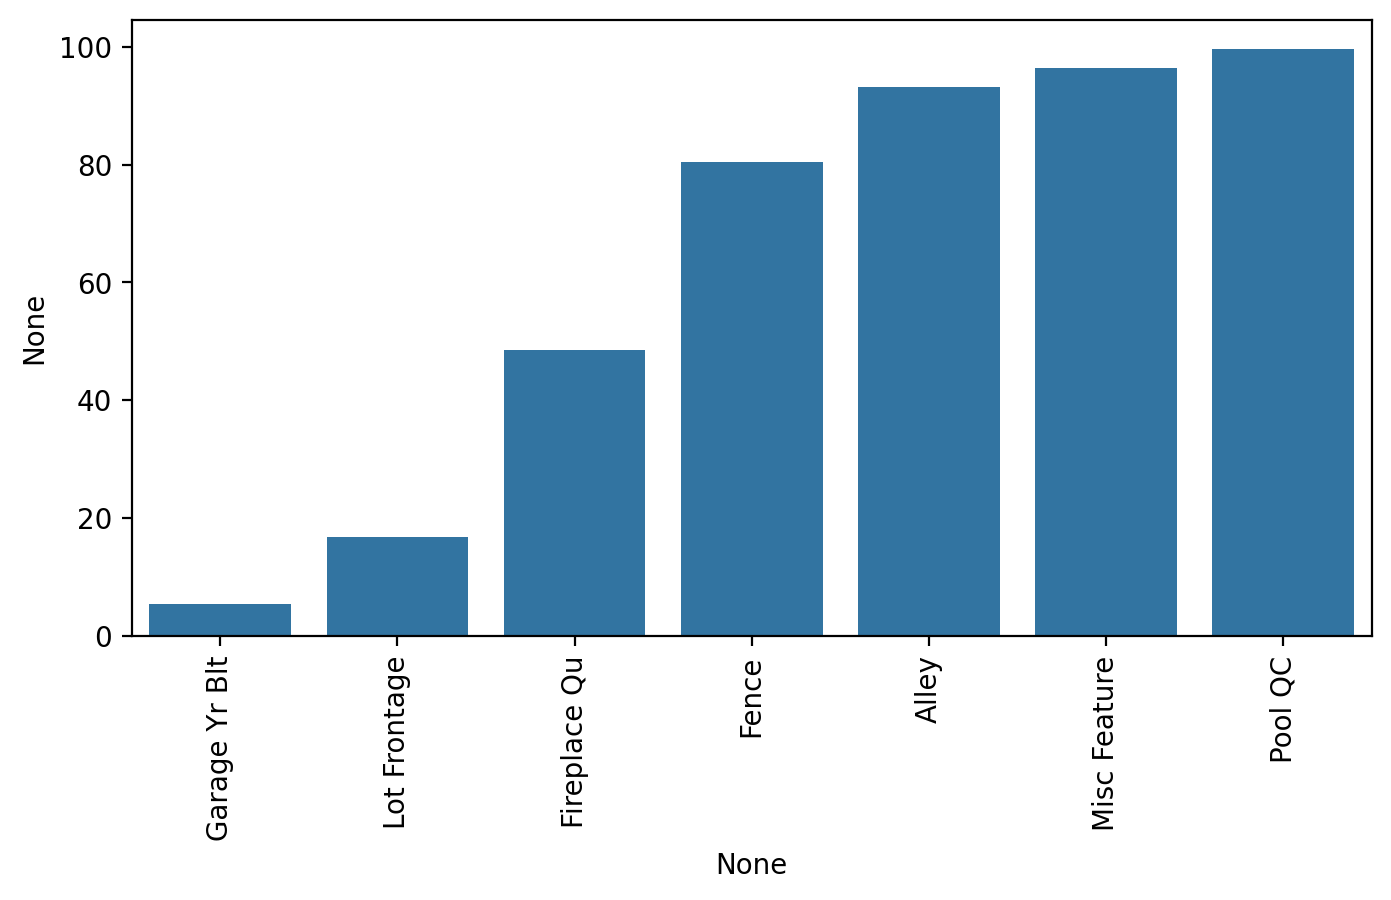

In [174]:

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


In [175]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [176]:
percent_nan.index

Index(['Garage Yr Blt', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

In [177]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

([0, 1], [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

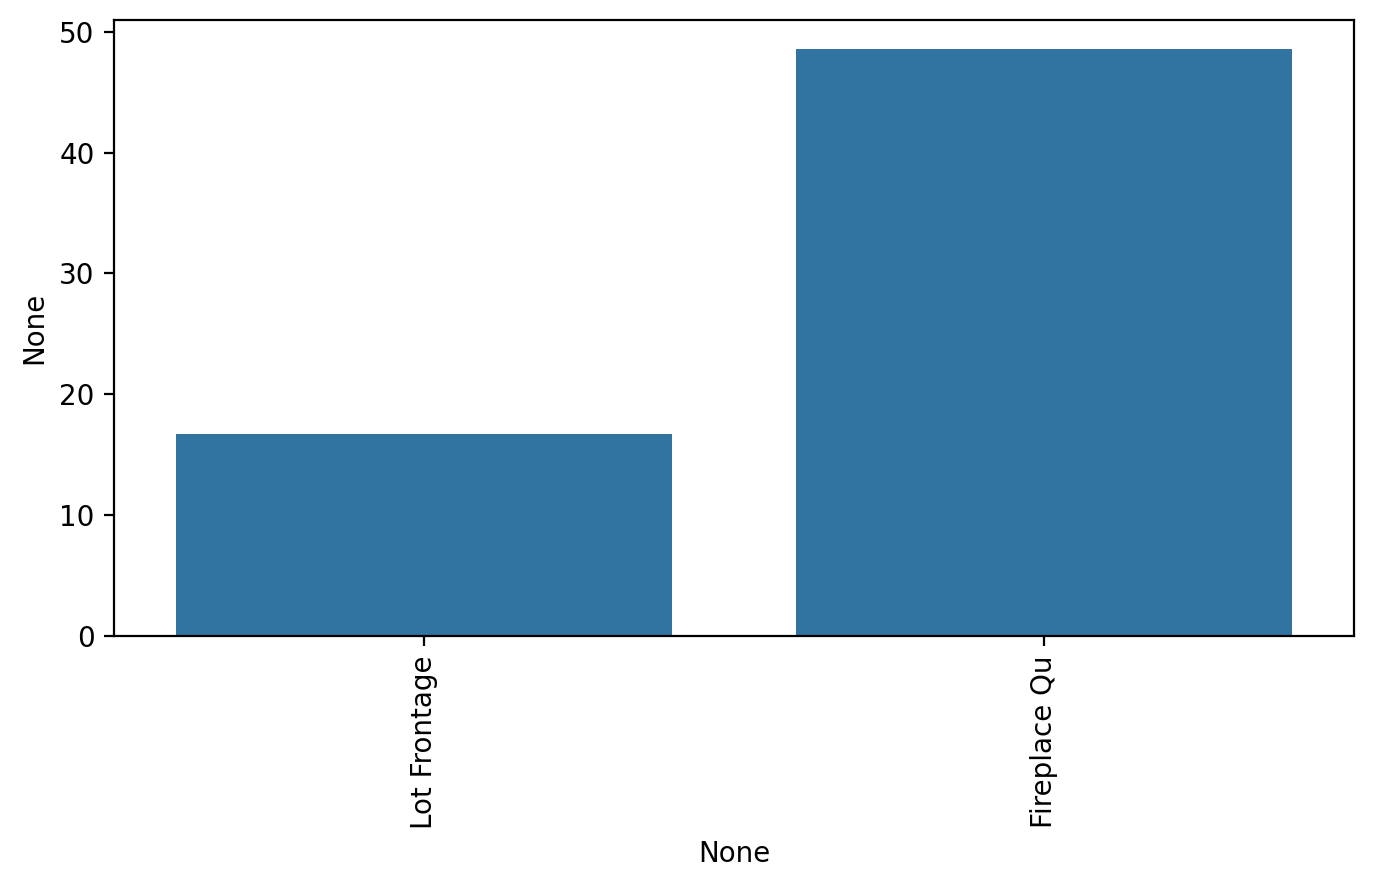

In [178]:
percent_nan=percent_missing(df)

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


In [179]:
#we cant drop row an feature in bo the the cases

#not enough is ,missing and not too little missing

In [180]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [181]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna("None")

In [182]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [183]:
#neighborhood:physical location within ames city limits
#Lotfrontage :linear feet of street connected to the property

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

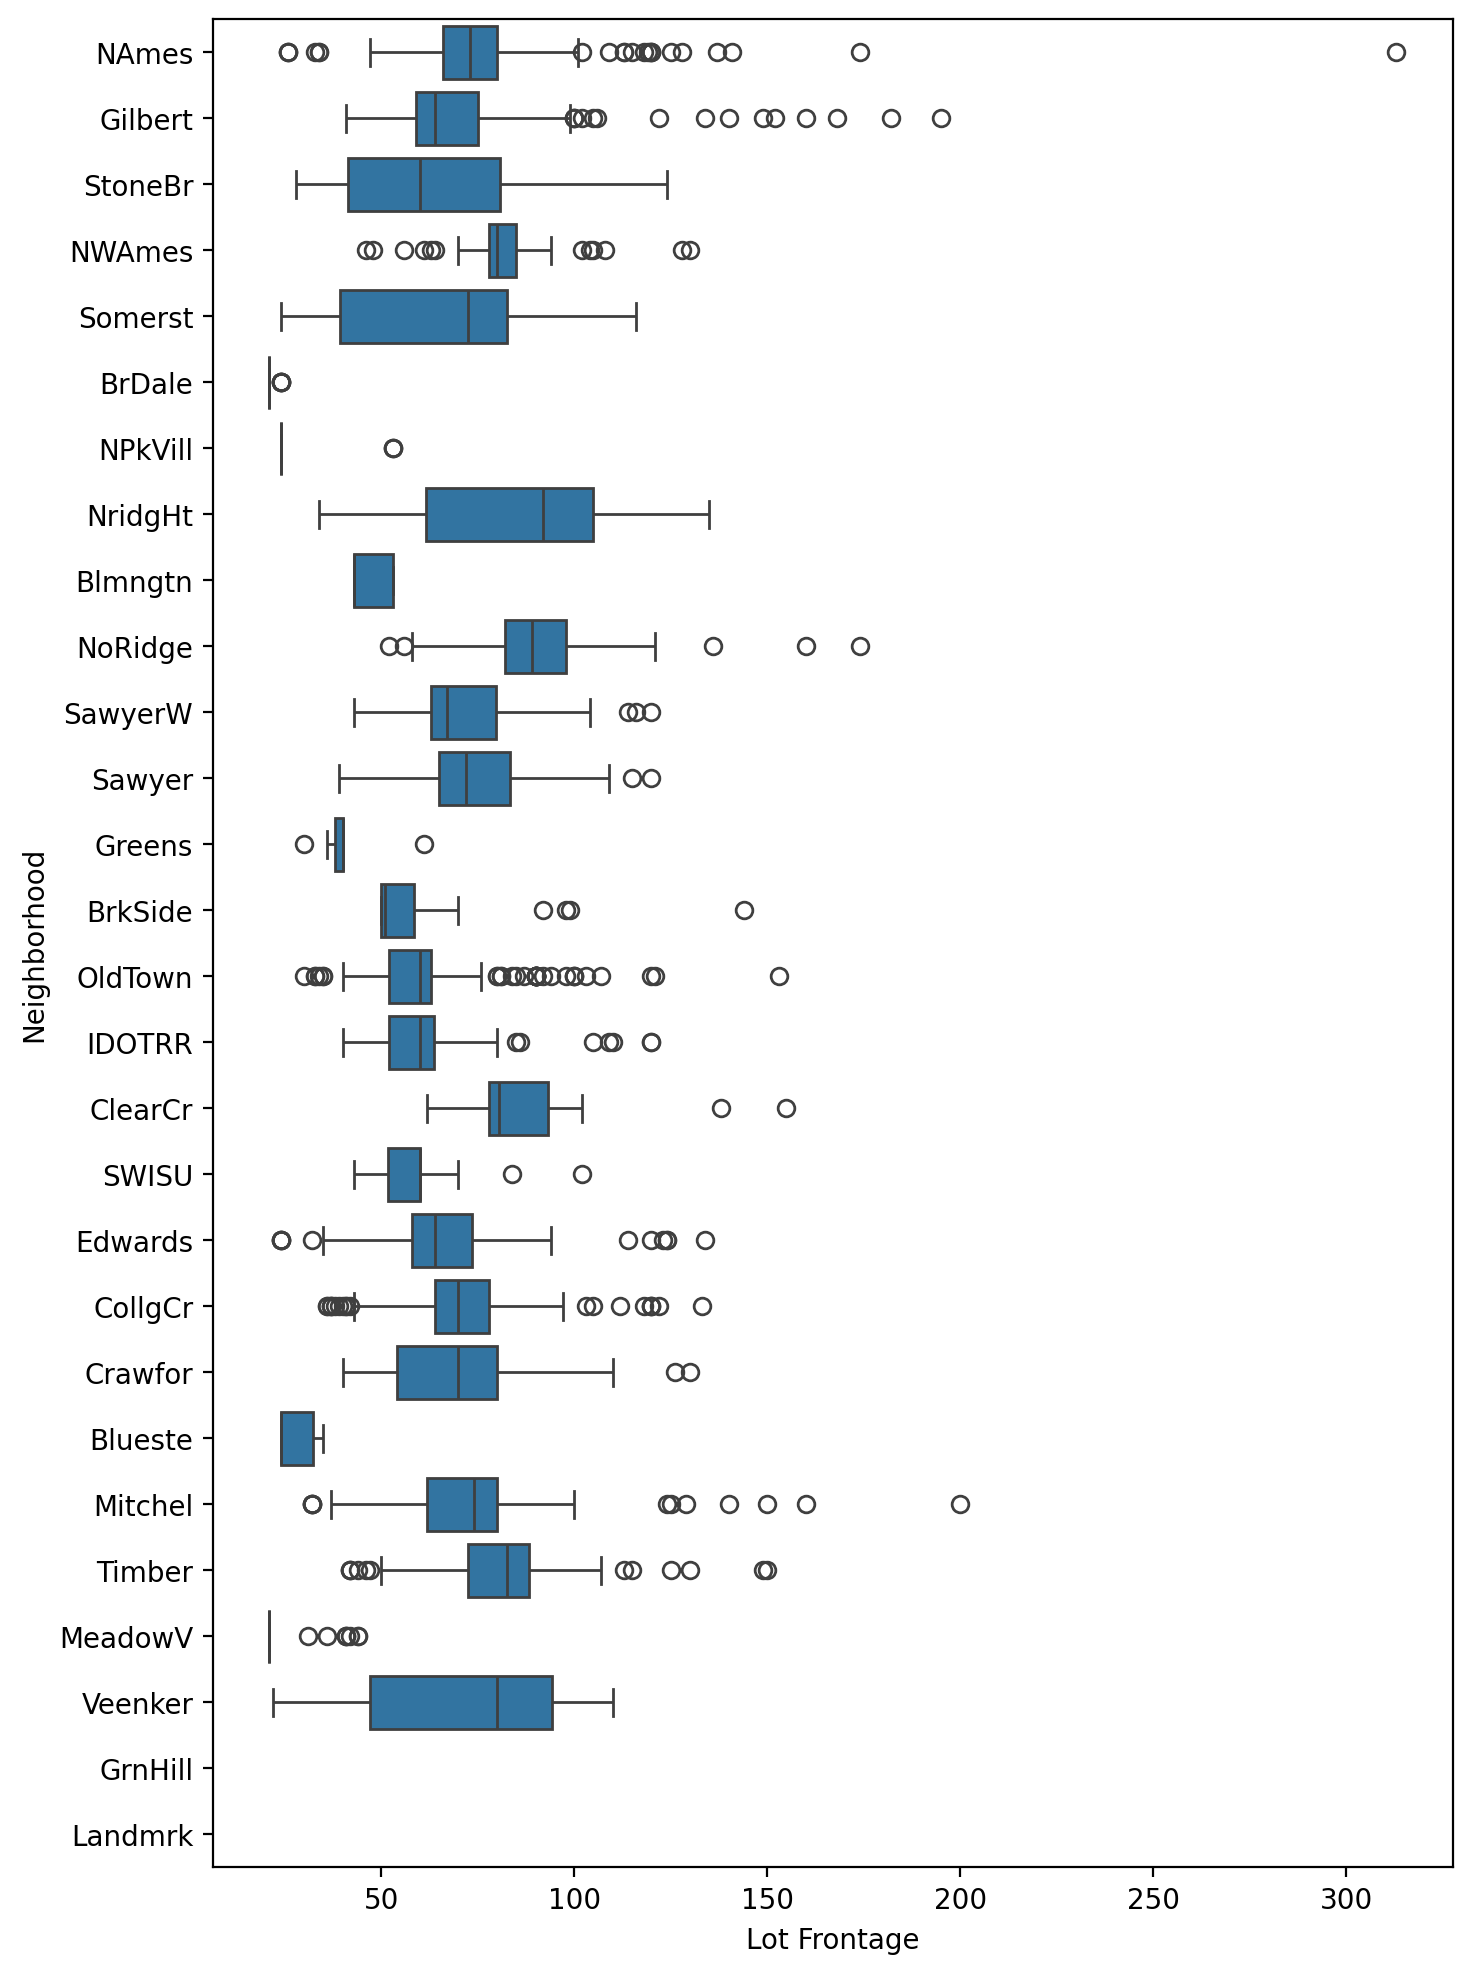

In [184]:
plt.figure(figsize=(8,12),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [185]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [186]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))


In [187]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [188]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [189]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [190]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [191]:
df['MS Sublass']=df['MS SubClass'].apply(str)

In [192]:
direction=pd.Series(['Up','Up','Down'])

In [193]:
direction

0      Up
1      Up
2    Down
dtype: object

In [194]:
pd.get_dummies(direction,drop_first=True)

,Up
0,True
1,True
2,False


In [195]:
df.select_dtypes(include='object')#checks datatype is object

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,MS Sublass
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal,20
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,20
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal,80
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Typ,None,None,None,None,None,Y,WD,Normal,85
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20


In [196]:
# df.info()
df.select_dtypes(include='object')#checks datatype is object

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,MS Sublass
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal,20
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,20
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal,80
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal,20
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Typ,None,None,None,None,None,Y,WD,Normal,85
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20


In [197]:
my_object_df=df.select_dtypes(include='object')

In [198]:
my_numeric_df=df.select_dtypes(exclude='object')

In [199]:
my_numeric_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,170000


In [200]:
df_object_dummies=pd.get_dummies(my_object_df,drop_first=True)

In [201]:
df_object_dummies

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,MS Sublass_30,MS Sublass_40,MS Sublass_45,MS Sublass_50,MS Sublass_60,MS Sublass_70,MS Sublass_75,MS Sublass_80,MS Sublass_85,MS Sublass_90
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2926,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2927,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2928,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [202]:
final_df=pd.concat([my_numeric_df,df_object_dummies],axis=1)

In [203]:
final_df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,MS Sublass_30,MS Sublass_40,MS Sublass_45,MS Sublass_50,MS Sublass_60,MS Sublass_70,MS Sublass_75,MS Sublass_80,MS Sublass_85,MS Sublass_90
0,20,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,False,False,False,False,False,False
2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,20,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,60,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2926,20,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,False,False,False,False,False,False
2927,85,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2928,20,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,False,False,False,False,False,False


In [204]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 275, dtype: float64

In [205]:
#mssubclass is integer encoding

In [206]:
#cross validation




In [209]:
final_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,MS Sublass_30,MS Sublass_40,MS Sublass_45,MS Sublass_50,MS Sublass_60,MS Sublass_70,MS Sublass_75,MS Sublass_80,MS Sublass_85,MS Sublass_90
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,False,False,False,False,False,False
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,False,False
